In [2]:
import numpy as np, cv2, glob, time, itertools, scipy
import pandas as pd, matplotlib.pyplot as plt
#import plotly.express as px
from operator import itemgetter
from evaluation_mcc import *

In [3]:
accuracies = []
f1_score = []
mcc = []

compression_rate = list(range(20, 110, 10))
n_compression_levels = len(compression_rate)

In [4]:
evaluation_metrics = pd.read_csv('D:/semester01/Multimedia-Security/armas-dct-copy/evaluation_metrics_all_compression_levels.csv')
evaluation_metrics

,Unnamed: 0,DATASET,COMPRESSION_TYPE,IMAGE,COMPRESSION_LEVEL,ACCURACY,F1_SCORE,MCC,JACCARD
0,0,comofod,JPEG,1,1,0.981380,0.082346,0.128905,0.042941
1,1,comofod,JPEG,1,2,0.980717,0.000000,-0.004593,0.000000
2,2,comofod,JPEG,1,3,0.980595,0.000786,-0.003262,0.000393
3,3,comofod,JPEG,1,4,0.981361,0.050894,0.091636,0.026111
4,4,comofod,JPEG,1,5,0.981316,0.047452,0.085717,0.024303
...,...,...,...,...,...,...,...,...,...
175,175,comofod,JPEG,20,5,0.989304,0.000000,NaN,0.000000
176,176,comofod,JPEG,20,6,0.989784,0.090353,0.211073,0.047314
177,177,comofod,JPEG,20,7,0.989872,0.105157,0.229473,0.055496
178,178,comofod,JPEG,20,8,0.990566,0.222082,0.342415,0.124912


In [5]:
def preprocess_data(evaluation_metrics, compression_rate, metric):
    df = pd.DataFrame(columns=compression_rate)
    counter = 0

    # für jedes bild
    for i in range(0, 20):


        # für alle compression levels
        for j in compression_rate:
            df.at[i, j] = evaluation_metrics.at[(counter,metric)]
            counter += 1
            #print(evaluation_metrics.at[i+counter,metric])

    return df

In [6]:
def line_plot(evaluation_metrics, metric, n_compression_levels, compression_type):

    index = 0
    values = list(range(n_compression_levels))

    fig = plt.subplots(1,1,figsize=(16,9))

    for image in range(0,20):
        for n in range(0,n_compression_levels):
            values[n] = evaluation_metrics.at[index+n,metric]
        plt.plot(compression_rate, values, label='Image ' + str(image+1))
        plt.scatter(compression_rate, values)
        index += n_compression_levels

    plt.xlabel("COMPRESSION RATE")
    plt.ylabel(metric)
    plt.title(metric + " OVER COMPRESSION RATE FOR " + compression_type + " COMPRESSION")
    plt.legend(loc='right')
    plt.savefig(('D:/semester01/Multimedia-Security/armas-dct-copy/plots/' + str.lower(metric) + '.png'))
    plt.show()

    return

In [7]:
def line_plot_averaged():
    return

In [8]:
def line_plot_mean():
    return

In [9]:
def boxplot(df, metric, compression_rate, compression_type):

    fig = plt.subplots(1,1,figsize=(16,9))

    plt.boxplot(df,positions=compression_rate,widths=1.5)
    plt.xlabel("COMPRESSION RATE")
    plt.ylabel(metric)
    plt.title(metric + " OVER COMPRESSION RATE FOR " + compression_type + " COMPRESSION")
    plt.savefig(('D:/semester01/Multimedia-Security/armas-dct-copy/plots/' + str.lower(metric) + '_boxplot.png'))
    plt.show()
    return

PLOT COMOFOD JPEG ACCURACY

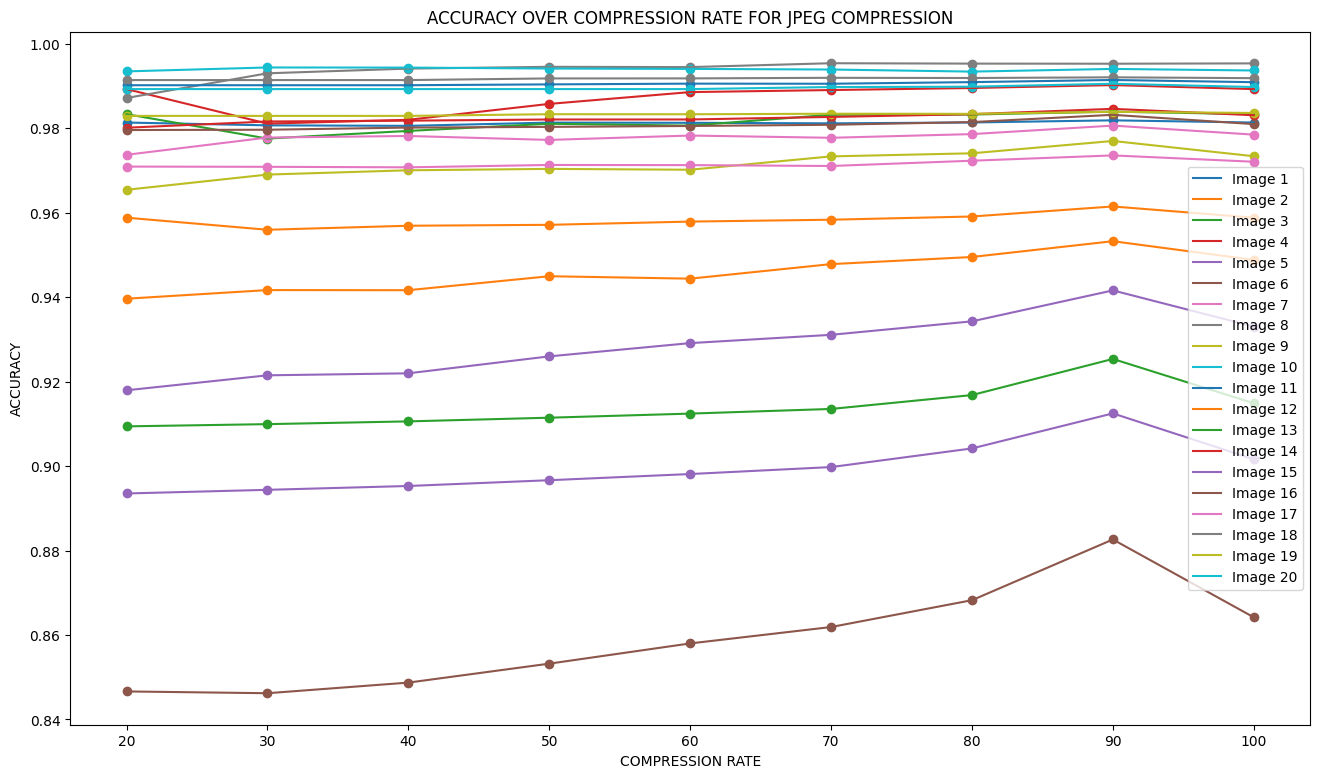

In [10]:
line_plot(evaluation_metrics,"ACCURACY",n_compression_levels,"JPEG")

PLOT COMOFOD JPEG ACCURACY BOXPLOT

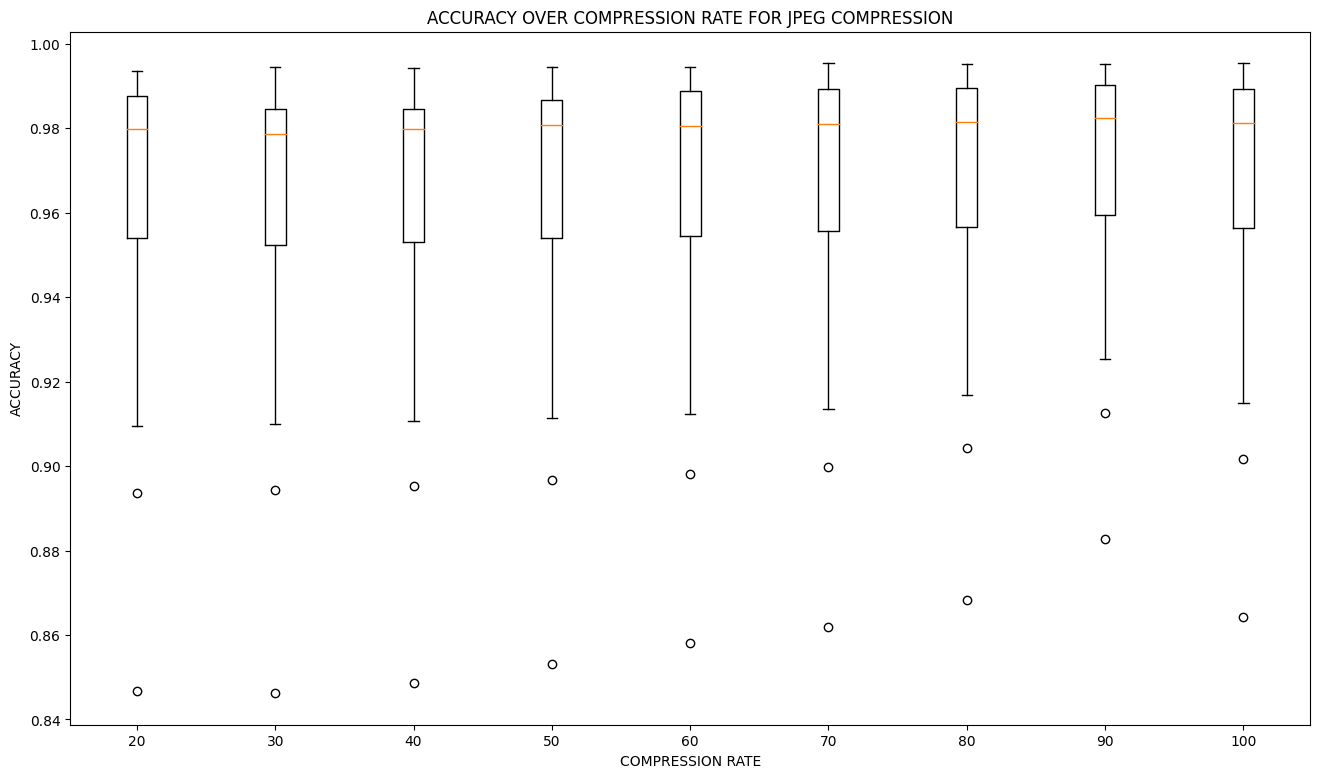

In [11]:
df = preprocess_data(evaluation_metrics, compression_rate, "ACCURACY")
boxplot(df,"ACCURACY",compression_rate,"JPEG")

PLOT COMOFOD JPEG F1_SCORE

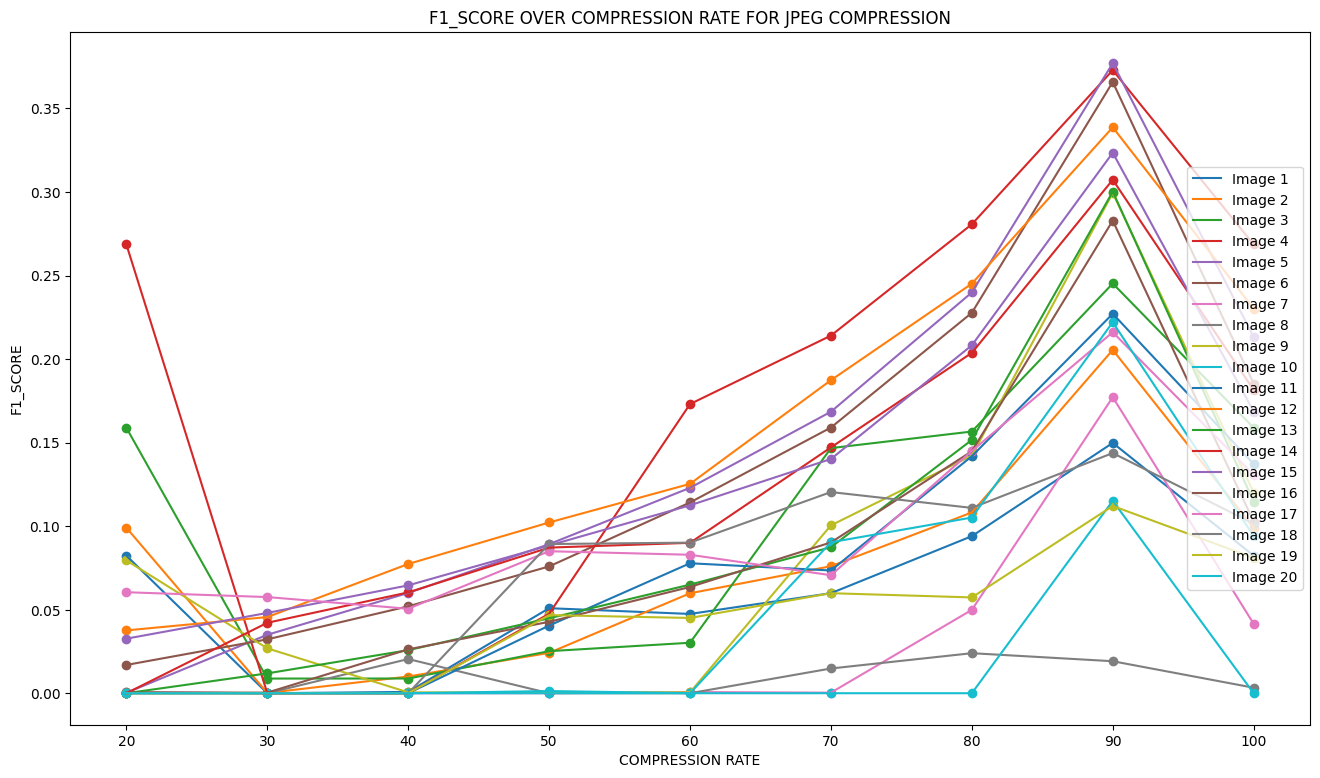

In [12]:
line_plot(evaluation_metrics,"F1_SCORE",n_compression_levels,"JPEG")

PLOT COMOFOD JPEG ACCURACY BOXPLOT

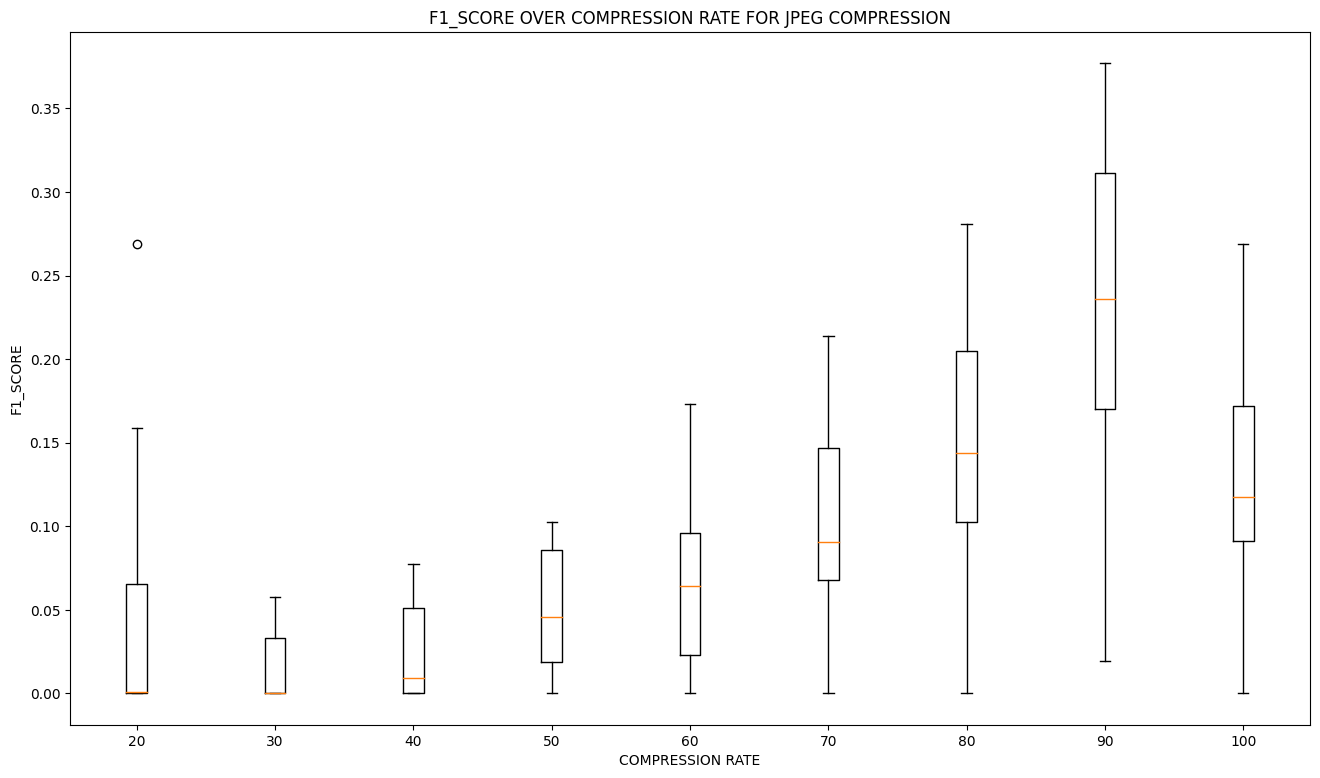

In [13]:
df = preprocess_data(evaluation_metrics, compression_rate, "F1_SCORE")
boxplot(df,"F1_SCORE",compression_rate,"JPEG")

PLOT COMOFOD JPEG MCC

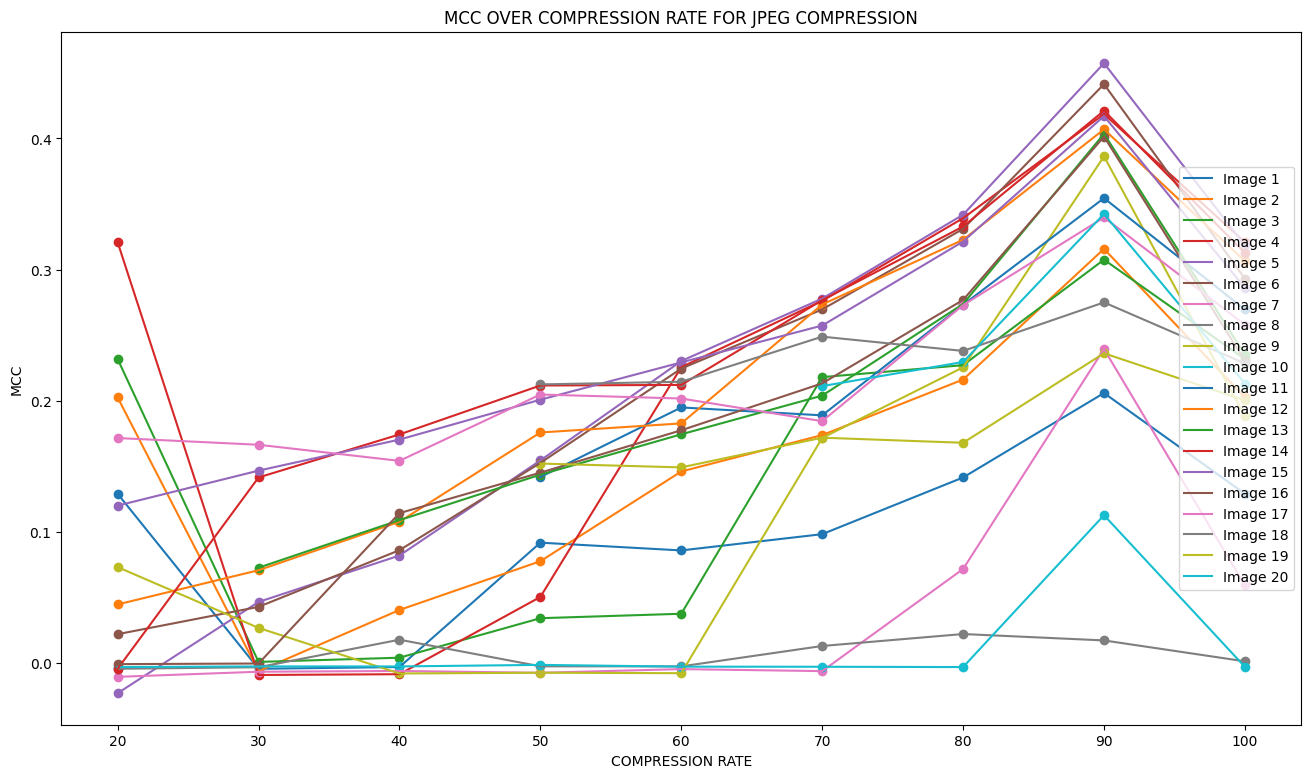

In [14]:
line_plot(evaluation_metrics,"MCC",n_compression_levels,"JPEG")

PLOT COMOFOD JPEG MCC BOXPLOT

c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


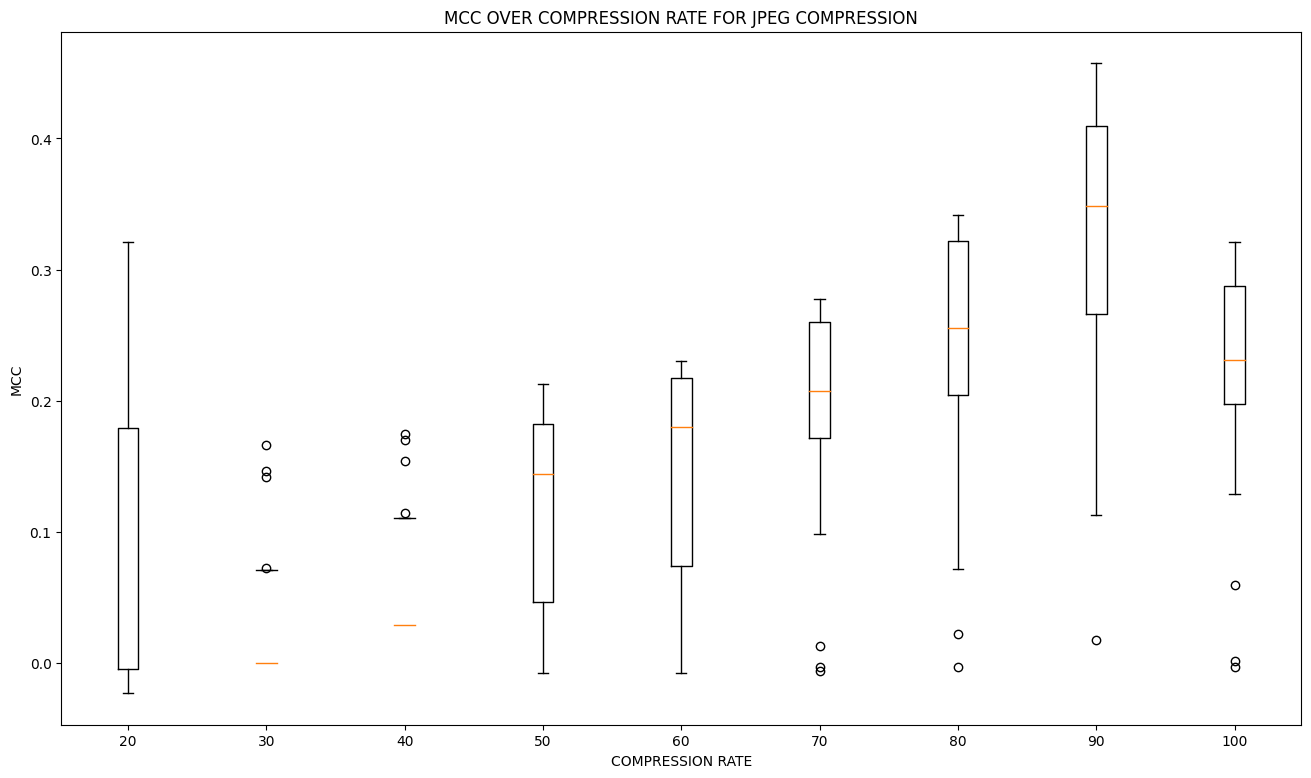

In [15]:
df = preprocess_data(evaluation_metrics, compression_rate, "MCC")
boxplot(df,"MCC",compression_rate,"JPEG")

PLOT COMOFOD JPEG JACCARD

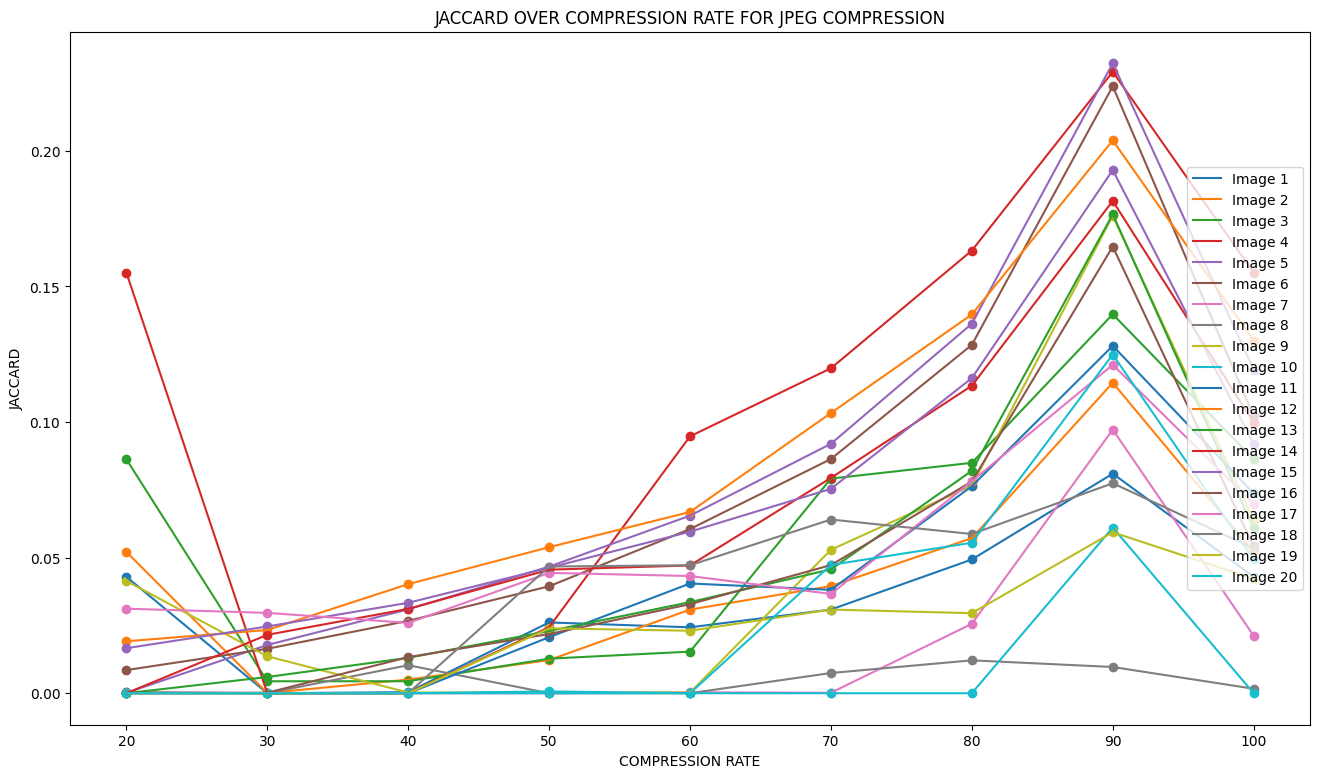

In [17]:
line_plot(evaluation_metrics,"JACCARD",n_compression_levels,"JPEG")

PLOT COMOFOD JPEG JACCARD BOXPLOT

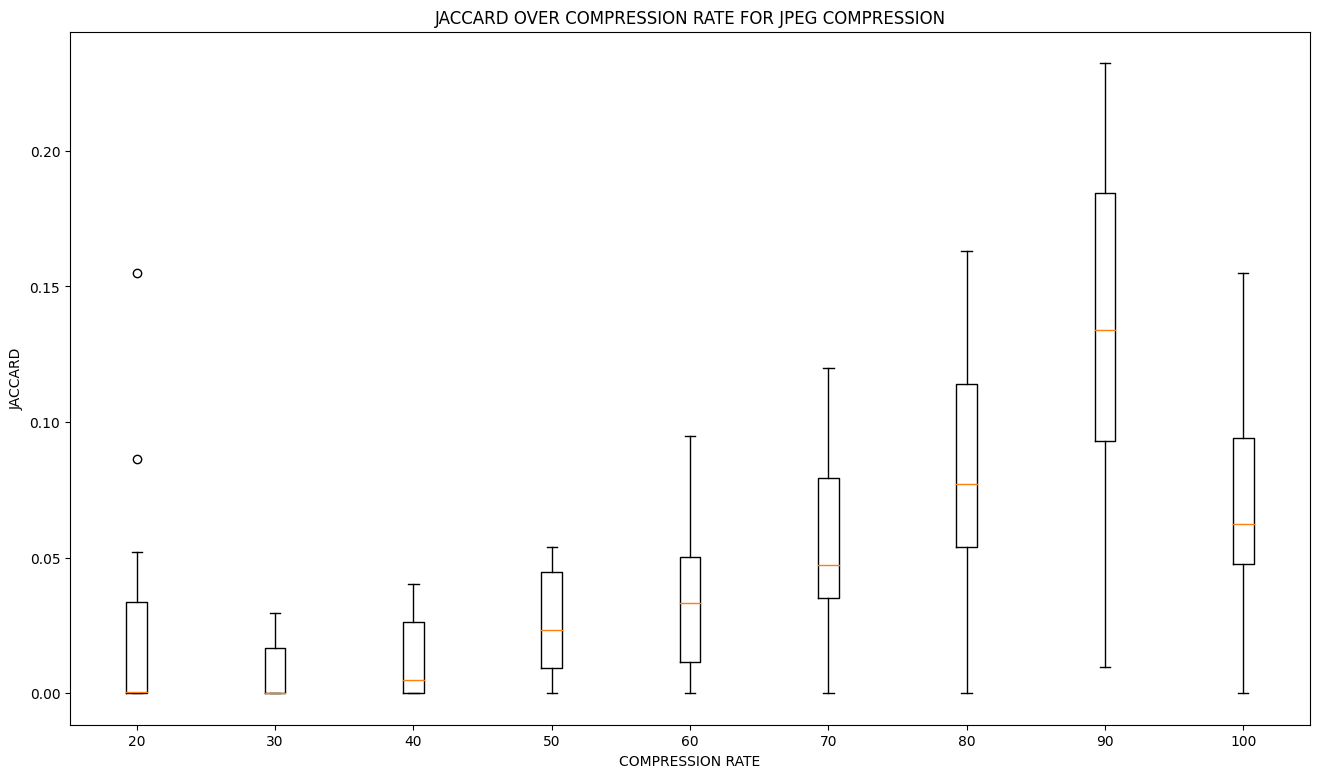

In [18]:
df = preprocess_data(evaluation_metrics, compression_rate, "JACCARD")
boxplot(df,"JACCARD",compression_rate,"JPEG")